# Limitation of Linear Regression

__[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)__

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [4]:
anscombe = sns.load_dataset("anscombe")

In [6]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [5]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [5]:
0.817**2

0.6674889999999999

In [7]:
# 'I', 'II', 'III', 'IV'
dataset = 'II' 
slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe[anscombe.dataset==dataset].x,
                                                               y=anscombe[anscombe.dataset==dataset].y)
print("""
slope       = {:.1f} 
intercept   = {:.2f} 
correlation = {:.3f} 
p value     = {:.3f}
std error   = {:.3f}""".format(slope, intercept, r_value, p_value , std_err))


slope       = 0.5 
intercept   = 3.00 
correlation = 0.816 
p value     = 0.002
std error   = 0.118


In [8]:
results = []
for dataset in 'I II III IV'.split():
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe[anscombe.dataset==dataset].x,
                                                               y=anscombe[anscombe.dataset==dataset].y)
    results.append([slope, intercept, r_value])

In [9]:
results

[[0.5000909090909091, 3.0000909090909103, 0.8164205163448399],
 [0.5000000000000001, 3.000909090909089, 0.816236506000243],
 [0.4997272727272729, 3.002454545454544, 0.8162867394895984],
 [0.4999090909090909, 3.0017272727272726, 0.8165214368885028]]

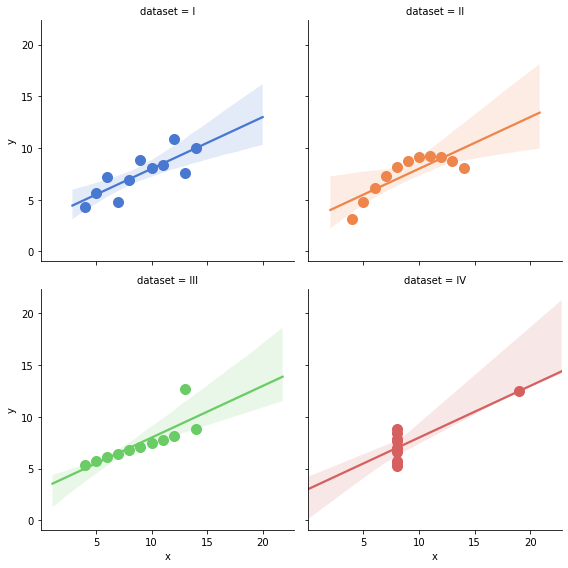

In [26]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, palette="muted", size=4, scatter_kws={"s": 100, "alpha": 1});

<br>
<br> 
<br>